# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from string import punctuation
from nltk.corpus import stopwords
import emoji
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from pprint import pprint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import itertools

# Read the data

In [13]:
AllTweets = pd.read_excel('Data/COVID-19 Master Sheet Final.xlsx')
AllTweets = AllTweets[['Number', 'A Codes #', 'Date', 'Text']]
AllTweets['A Codes #'] = AllTweets['A Codes #'].replace('?', np.nan)
AllTweets['A Codes #'] = AllTweets['A Codes #'].replace(33.0, 3.0)
AllTweets.dropna(inplace=True)

#the index numbers are not correct so we reindex the dataframe
AllTweets.reset_index(drop=True, inplace=True)
AllTweets['A Codes #'] = AllTweets['A Codes #'].astype(int)
AllTweets

,Number,A Codes #,Date,Text
0,1,99,2020-09-07,Man I tried. I had a gal lined up to join Mili...
1,2,2,2020-09-07,My grandmother requires 24/7 supervision due t...
2,3,2,2020-09-07,"I cry too, my 92 year old mum with advanced de..."
3,4,1,2020-09-07,Now that covid has killed my mom I am going to...
4,5,99,2020-09-07,Depends on the comorbidities. When I see them ...
5,6,98,2020-09-07,My friends nan had dementia for ages and she w...
6,7,4,2020-09-07,Watched another heart breaking story of dement...
7,8,99,2020-09-07,It's about Labor UNIONS. You know the thing th...
8,9,98,2020-09-07,My mum received the covid virus as a free gift...
9,10,3,2020-09-07,Really cross to be told my mum - dementia and ...


# Plot the frequency of each category (excluding codes 98, 99, and 100)

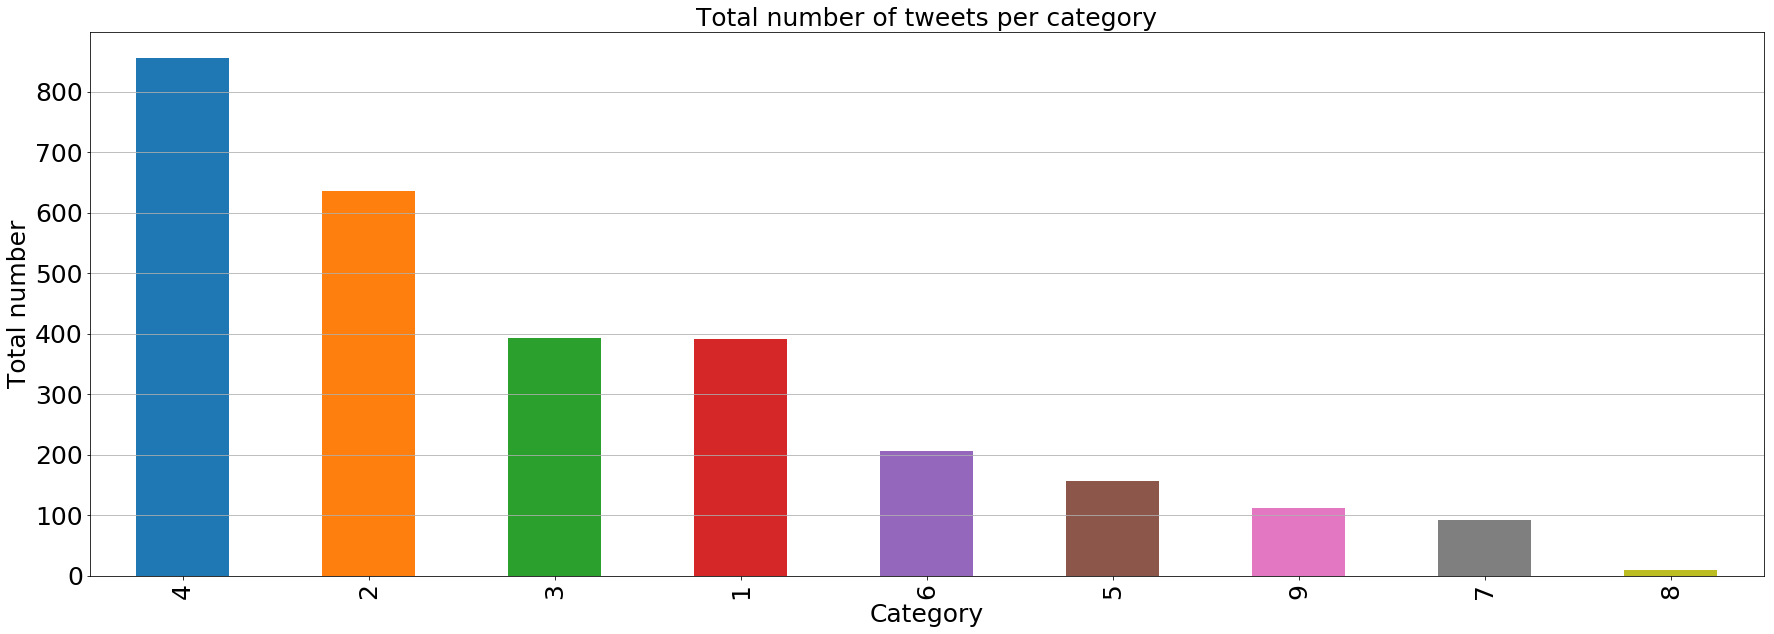

In [16]:
NotAllTweets = AllTweets[AllTweets['A Codes #'] < 10]

plt.figure(figsize=(30,10))
NotAllTweets['A Codes #'].value_counts().plot(kind='bar')
# plt.legend(loc='best', fontsize=25)
plt.grid(True, axis='y')
plt.xlabel("Category", fontsize=25)
plt.ylabel("Total number", fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.title('Total number of tweets per category', fontsize=25)
plt.savefig("Figures/TotalTweetsPerCategory", dpi=100)

In [80]:
AllTweets.dtypes

Number         int64
A Codes #    float64
Date          object
Text          object
Class          int64
dtype: object

In [9]:
AllTweets.rename(columns={'A Codes #': 'Class'}, inplace=True)
AllTweets['Class'] = AllTweets['Class'].astype(int)
AllTweets

,Number,Class,Date,Text
0,1,99,2020-09-07,Man I tried. I had a gal lined up to join Mili...
1,2,2,2020-09-07,My grandmother requires 24/7 supervision due t...
2,3,2,2020-09-07,"I cry too, my 92 year old mum with advanced de..."
3,4,1,2020-09-07,Now that covid has killed my mom I am going to...
4,5,99,2020-09-07,Depends on the comorbidities. When I see them ...
5,6,98,2020-09-07,My friends nan had dementia for ages and she w...
6,7,4,2020-09-07,Watched another heart breaking story of dement...
7,8,99,2020-09-07,It's about Labor UNIONS. You know the thing th...
8,9,98,2020-09-07,My mum received the covid virus as a free gift...
9,10,3,2020-09-07,Really cross to be told my mum - dementia and ...


# Text cleaning and preparation

## Remove emojis 

In [10]:
def remove_emojis(text: str) -> str:
    return ''.join(c for c in text if c not in emoji.UNICODE_EMOJI)

AllTweets['Text_Cleaned'] = [remove_emojis(item) for item in AllTweets['Text']]

## Special character cleaning

We can see the following special characters:

1. \r
2. \n
3. \ before possessive pronouns (government's = government\'s)
4. \ before possessive pronouns 2 (Yukos' = Yukos\')
5. " when quoting text


In [11]:
# \r and \n
AllTweets['Text_Cleaned'] = AllTweets['Text_Cleaned'].str.replace("\r", " ")
AllTweets['Text_Cleaned'] = AllTweets['Text_Cleaned'].str.replace("\n", " ")
AllTweets['Text_Cleaned'] = AllTweets['Text_Cleaned'].str.replace("    ", " ")

## Upcase/downcase 

We'll downcase the texts because we want, for example, Football and football to be the same word.

In [12]:
AllTweets['Text_Cleaned'] = AllTweets['Text_Cleaned'].str.lower()

## Possessive pronouns 

In [13]:
AllTweets['Text_Cleaned'] = AllTweets['Text_Cleaned'].str.replace("'s", "")

## Punctuation signs

In [14]:
punctuation_signs = list(punctuation)

for punct_sign in punctuation_signs:
    AllTweets['Text_Cleaned'] = AllTweets['Text_Cleaned'].str.replace(punct_sign, '')

## Stemming and Lemmatization 

Since stemming can produce output words that don't exist, we'll only use a lemmatization process at this moment. Lemmatization takes into consideration the morphological analysis of the words and returns words that do exist, so it will be more useful for us.

In [15]:
# Downloading punkt and wordnet from NLTK
nltk.download('punkt')
print("------------------------------------------------------------")
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mahsa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
------------------------------------------------------------
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Mahsa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [16]:
# Saving the lemmatizer into an object
wordnet_lemmatizer = WordNetLemmatizer()



In order to lemmatize, we have to iterate through every word:


In [17]:
nrows = len(AllTweets)
lemmatized_text_list = []

for row in range(0, nrows):
    
    # Create an empty list containing lemmatized words
    lemmatized_list = []
    
    # Save the text and its words into an object
    text = AllTweets.loc[row]['Text_Cleaned']
    text_words = text.split(" ")

    # Iterate through every word to lemmatize
    for word in text_words:
        lemmatized_list.append(wordnet_lemmatizer.lemmatize(word, pos="v"))
        
    # Join the list
    lemmatized_text = " ".join(lemmatized_list)
    
    # Append to the list containing the texts
    lemmatized_text_list.append(lemmatized_text)

In [18]:
AllTweets['Text_Cleaned_2'] = lemmatized_text_list

## Remove stop words

In [19]:
stop_words = list(stopwords.words('english'))

for stop_word in stop_words:

    regex_stopword = r"\b" + stop_word + r"\b"
    AllTweets['Text_Cleaned_2'] = AllTweets['Text_Cleaned_2'].str.replace(regex_stopword, '')

In [158]:
AllTweets.loc[5]['Text']

'My friends nan had dementia for ages and she was put down as a covid death?'

In [157]:
AllTweets.loc[5]['Text_Cleaned']

'my friends nan had dementia for ages and she was put down as a covid death'

In [159]:
AllTweets.loc[5]['Text_Cleaned_2']

' friends nan  dementia  age    put    covid death'

# Create the model 

##  Train - test split 

In [20]:
X_train, X_test, y_train, y_test = train_test_split(AllTweets['Text_Cleaned_2'], 
                                                    AllTweets['Class'], 
                                                    test_size=0.2, 
                                                    random_state=8)

## Vectorization 

In [21]:
# Parameter election
ngram_range = (1,2)
min_df = 10
max_df = 1.
max_features = 300

In [22]:
tfidf = TfidfVectorizer(encoding='utf-8',
                        ngram_range=ngram_range,
                        stop_words=None,
                        lowercase=False,
                        max_df=max_df,
                        min_df=min_df,
                        max_features=max_features,
                        norm='l2',
                        sublinear_tf=True)
                        
features_train = tfidf.fit_transform(X_train).toarray()
labels_train = y_train
print(features_train.shape)

features_test = tfidf.transform(X_test).toarray()
labels_test = y_test
print(features_test.shape)

(1094, 300)
(274, 300)


In [23]:
from sklearn.feature_selection import chi2

for category_id in AllTweets['Class'].unique():
    features_chi2 = chi2(features_train, labels_train == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}' category:".format(category_id))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-5:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-2:])))
    print("")

# '99' category:
  . Most correlated unigrams:
. see
. show
. home
. economy
. brain
  . Most correlated bigrams:
. nurse home
. care home

# '2' category:
  . Most correlated unigrams:
. test
. part
. resident
. please
. positive
  . Most correlated bigrams:
. positive covid
. test positive

# '1' category:
  . Most correlated unigrams:
. die
. also
. pass
. away
. lose
  . Most correlated bigrams:
. die covid
. pass away

# '98' category:
  . Most correlated unigrams:
. put
. cause
. die
. certificate
. death
  . Most correlated bigrams:
. cause death
. death certificate

# '4' category:
  . Most correlated unigrams:
. able
. visitors
. cant
. visit
. see
  . Most correlated bigrams:
. death certificate
. love ones

# '3' category:
  . Most correlated unigrams:
. ask
. money
. eat
. rn
. lay
  . Most correlated bigrams:
. take care
. care dad

# '8' category:
  . Most correlated unigrams:
. doctor
. im
. worse
. far
. new
  . Most correlated bigrams:
. nurse home
. corona virus

# '5

In [24]:
AllTweets

,Number,Class,Date,Text,Text_Cleaned,Text_Cleaned_2
0,1,99,2020-09-07,Man I tried. I had a gal lined up to join Mili...,man i tried i had a gal lined up to join milit...,man try gal line join military intellige...
1,2,2,2020-09-07,My grandmother requires 24/7 supervision due t...,my grandmother requires 247 supervision due to...,grandmother require 247 supervision due dem...
2,3,2,2020-09-07,"I cry too, my 92 year old mum with advanced de...",i cry too my 92 year old mum with advanced dem...,cry 92 year old mum advance dementia ’ se...
3,4,1,2020-09-07,Now that covid has killed my mom I am going to...,now that covid has killed my mom i am going to...,covid kill mom go nasty people live...
4,5,99,2020-09-07,Depends on the comorbidities. When I see them ...,depends on the comorbidities when i see them a...,depend comorbidities see add alzheimers ...
5,6,98,2020-09-07,My friends nan had dementia for ages and she w...,my friends nan had dementia for ages and she w...,friends nan dementia age put covid death
6,7,4,2020-09-07,Watched another heart breaking story of dement...,watched another heart breaking story of dement...,watch another heart break story dementia se...
7,8,99,2020-09-07,It's about Labor UNIONS. You know the thing th...,it about labor unions you know the thing that ...,labor unions know thing gop try kill...
8,9,98,2020-09-07,My mum received the covid virus as a free gift...,my mum received the covid virus as a free gift...,mum receive covid virus free gift whilst ...
9,10,3,2020-09-07,Really cross to be told my mum - dementia and ...,really cross to be told my mum dementia and d...,really cross tell mum dementia diabetes s...


## Randomized Search Cross Validation

We first need to define the grid:

In [25]:
# n_estimators
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]

# max_features
max_features = ['auto', 'sqrt']

# max_depth
max_depth = [int(x) for x in np.linspace(20, 100, num = 5)]
max_depth.append(None)

# min_samples_split
min_samples_split = [2, 5, 10]

# min_samples_leaf
min_samples_leaf = [1, 2, 4]

# bootstrap
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [20, 40, 60, 80, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000]}


Then, we'll perform the Random Search:

In [26]:
# First create the base model to tune
rfc = RandomForestClassifier(random_state=8)

# Definition of the random search
random_search = RandomizedSearchCV(estimator=rfc,
                                   param_distributions=random_grid,
                                   n_iter=50,
                                   scoring='accuracy',
                                   cv=3, 
                                   verbose=1, 
                                   random_state=8)

# Fit the random search model
random_search.fit(features_train, labels_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


C:\Users\Mahsa\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  4.7min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

We can see the best hyperparameters resulting from the Random Search:

In [28]:
print("The best hyperparameters from Random Search are:")
print(random_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(random_search.best_score_)

The best hyperparameters from Random Search are:
{'n_estimators': 600, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}

The mean accuracy of a model with these hyperparameters is:
0.5091407678244972


After that, we can do a more exhaustive search centered in those values:

## Grid Search Cross Validation

In [29]:
# Create the parameter grid based on the results of random search 
bootstrap = [True]
max_depth = [None]
max_features = ['sqrt']
min_samples_leaf = [1, 2, 4]
min_samples_split = [2, 5, 10]
n_estimators = [500, 600, 700]

param_grid = {
    'bootstrap': bootstrap,
    'max_depth': max_depth,
    'max_features': max_features,
    'min_samples_leaf': min_samples_leaf,
    'min_samples_split': min_samples_split,
    'n_estimators': n_estimators
}

# Create a base model
rfc = RandomForestClassifier(random_state=8)

# Manually create the splits in CV in order to be able to fix a random_state (GridSearchCV doesn't have that argument)
cv_sets = ShuffleSplit(n_splits = 3, test_size = .33, random_state = 8)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rfc, 
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=cv_sets,
                           verbose=1)

# Fit the grid search to the data
grid_search.fit(features_train, labels_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed:  2.0min finished


GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=8, test_size=0.33, train_size=None),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_...
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=8,
                                              verbose=0, warm_start=False),
  

The best hyperparameters turn out to be:

In [30]:
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)

The best hyperparameters from Grid Search are:
{'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 700}

The mean accuracy of a model with these hyperparameters is:
0.5101289134438306


In [31]:
best_rfc = grid_search.best_estimator_
best_rfc

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=None, oob_score=False, random_state=8, verbose=0,
                       warm_start=False)

## Model fit and performance 

In [33]:
best_rfc.fit(features_train, labels_train)

yTrain_pred = best_rfc.predict(features_train)

yTest_pred = best_rfc.predict(features_test)

# Training accuracy
print("The training accuracy is: ")
print(accuracy_score(labels_train, yTrain_pred)*100)

# Test accuracy
print("The test accuracy is: ")
print(accuracy_score(labels_test, yTest_pred)*100)

# Classification report
print("Classification report")
print(classification_report(labels_test,yTest_pred))

The training accuracy is: 
100.0
The test accuracy is: 
51.09489051094891
Classification report
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        13
           2       0.39      0.31      0.35        29
           3       1.00      0.03      0.05        39
           4       0.53      0.70      0.60        46
           5       1.00      0.11      0.20         9
           6       0.00      0.00      0.00         7
           9       0.00      0.00      0.00         3
          98       0.77      0.65      0.71        26
          99       0.50      0.81      0.62        99
         100       0.00      0.00      0.00         3

    accuracy                           0.51       274
   macro avg       0.42      0.26      0.25       274
weighted avg       0.56      0.51      0.44       274



C:\Users\Mahsa\AppData\Roaming\Python\Python36\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Mahsa\AppData\Roaming\Python\Python36\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Mahsa\AppData\Roaming\Python\Python36\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Confusion Matrix

In [35]:
def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if cmap is None:
        cmap = plt.get_cmap('Blues')
    plt.figure(figsize=(8, 6))
    plt.title(title)
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.0f}%".format(cm[i, j]*100), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.2f}'.format(100 * accuracy))
    plt.show()

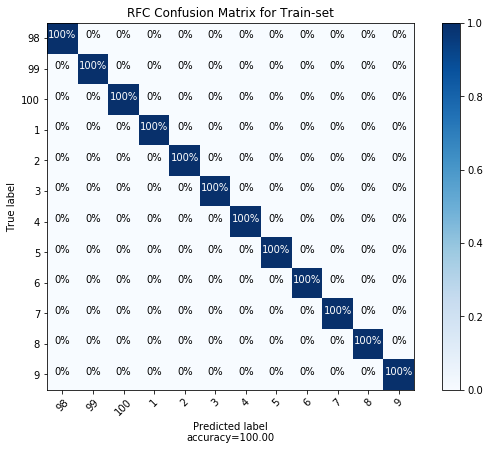

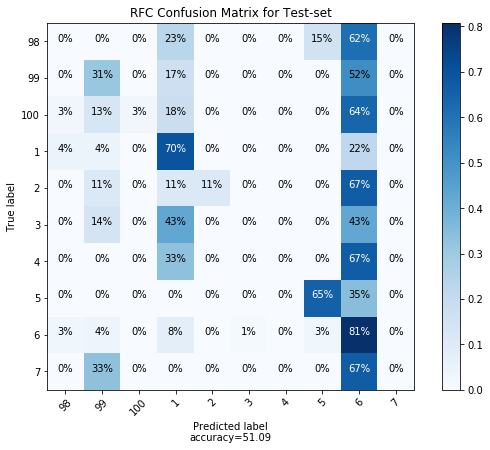

In [36]:
plot_confusion_matrix(cm=confusion_matrix(labels_train, yTrain_pred),  cmap=None, normalize=True,
                      target_names=['98', '99','100', '1', '2', '3', '4', '5', '6', '7', '8','9'],
                          title="RFC Confusion Matrix for Train-set")
plot_confusion_matrix(cm=confusion_matrix(labels_test, yTest_pred),  cmap=None, normalize=True,
                     target_names=['98', '99','100', '1', '2', '3', '4', '5', '6', '7', '8','9'],
                          title="RFC Confusion Matrix for Test-set")